<h1 align=center><font size = 5>Capstone project - Week2</font></h1>
<h1 align=center><font size = 5>Market Entry Research for Restaurant in Dubiln City (Ireland)</font></h1>

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1. <a href="#item1">Download and Explore Dataset</a>

2. <a href="#item2">Explore Neighborhoods in New York City</a>

3. <a href="#item3">Analyze Each Neighborhood</a>

4. <a href="#item4">Cluster Neighborhoods</a>

5. <a href="#item5">Examine Clusters</a>    
</font>
</div>

Before we get the data and start exploring it, let's download all the dependencies that we will need.

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans


print('Libraries imported.')

Libraries imported.


In [2]:

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
print('folium Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    altair-3.2.0               |           py36_0         770 KB  conda-forge
    ca-certificates-2019.9.11  |       hecc5488_0         144 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    certifi-2019.9.11          |           py36_0         147 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.3 MB

The following NEW packages will be 

<a id='item1'></a>

## 1. Download and Explore Dataset

URL: Downloded data from https://www.autoaddress.ie/support/developer-centre/resources/routing-key-boundaries
1. Get entire page as string
2. Convert string to HTML
3. neightborhood_info_table : parse html table with class  wikitable
4. Extract the 'Postcode', 'Borough', 'Neighbourhood'info from the table

In [3]:
from bs4 import BeautifulSoup # scraping library

In [4]:
url = "https://www.autoaddress.ie/support/developer-centre/resources/routing-key-boundaries"

text_result = requests.get(url).text 
html_parsed_result = BeautifulSoup(text_result, 'html.parser') 

neightborhood_info_table = html_parsed_result.find('table', class_ = 'three')
neightborhood_rows = neightborhood_info_table.find_all('tr')

# extract the info ('Postcode', 'District Post code') 
neightborhood_info = []
for row in neightborhood_rows:
    info = row.text.split('\n')[1:-1] # remove empty str (first and last items)
    neightborhood_info.append(info)
    
neightborhood_info[0:10]
# print('Data downloaded!')

[['ROUTING KEY', 'DESCRIPTOR'],
 ['Y14', 'ARKLOW'],
 ['A84', 'ASHBOURNE'],
 ['H65', 'ATHENRY'],
 ['N37', 'ATHLONE'],
 ['R14', 'ATHY'],
 ['K32', 'BALBRIGGAN'],
 ['F26', 'BALLINA'],
 ['H53', 'BALLINASLOE'],
 ['P31', 'BALLINCOLLIG']]

#### Tranform the data into a *pandas* dataframe

Next, let's load the data.

In [5]:
from bs4 import BeautifulSoup # scraping library

URL: Downloded data from https://www.autoaddress.ie/support/developer-centre/resources/routing-key-boundaries
1. Get entire page as string
2. Convert string to HTML
3. neightborhood_info_table : parse html table with class  wikitable
4. Extract the 'Postcode', 'Borough', 'Neighbourhood'info from the table

In [6]:
url = "https://www.autoaddress.ie/support/developer-centre/resources/routing-key-boundaries"

text_result = requests.get(url).text 
html_parsed_result = BeautifulSoup(text_result, 'html.parser') 

neightborhood_info_table = html_parsed_result.find('table', class_ = 'three')
neightborhood_rows = neightborhood_info_table.find_all('tr')

# extract the info ('Postcode', 'Borough', 'Neighbourhood') 
neightborhood_info = []
for row in neightborhood_rows:
    info = row.text.split('\n')[1:-1] # remove empty str (first and last items)
    neightborhood_info.append(info)
    
neightborhood_info[0:10]
# print('Data downloaded!')

[['ROUTING KEY', 'DESCRIPTOR'],
 ['Y14', 'ARKLOW'],
 ['A84', 'ASHBOURNE'],
 ['H65', 'ATHENRY'],
 ['N37', 'ATHLONE'],
 ['R14', 'ATHY'],
 ['K32', 'BALBRIGGAN'],
 ['F26', 'BALLINA'],
 ['H53', 'BALLINASLOE'],
 ['P31', 'BALLINCOLLIG']]

In [7]:
#create a Neighborhood dataframe
neightborhood_info[0][-1] = 'Neighborhood' 
neighborhood_df = pd.DataFrame(neightborhood_info, columns=['Key','Neighbourhood','Drop1', 'Drop2'])
neighborhood_df.head(10)
cleandf1 = neighborhood_df.drop(neighborhood_df.index[0])
cleandf2 = cleandf1.drop('Drop1', axis=1)
cleandf3 = cleandf2.drop('Drop2', axis=1)

In [8]:
cleandf3.head(10)

,Key,Neighbourhood
1,Y14,ARKLOW
2,A84,ASHBOURNE
3,H65,ATHENRY
4,N37,ATHLONE
5,R14,ATHY
6,K32,BALBRIGGAN
7,F26,BALLINA
8,H53,BALLINASLOE
9,P31,BALLINCOLLIG
10,F31,BALLINROBE


In [9]:
cleandf3 = cleandf3[cleandf3.Neighbourhood.str.contains("DUB")]
cleandf3.head(20)

,Key,Neighbourhood
51,D01,DUBLIN 1
52,D02,DUBLIN 2
53,D03,DUBLIN 3
54,D04,DUBLIN 4
55,D05,DUBLIN 5
56,D06,DUBLIN 6
57,D6W,DUBLIN 6W
58,D07,DUBLIN 7
59,D08,DUBLIN 8
60,D09,DUBLIN 9


In [10]:
geolocator = Nominatim(user_agent="dublin_explorer")
from geopy.extra.rate_limiter import RateLimiter
# 1 - conveneint function to delay between geocoding calls
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
# 2- - create location column
cleandf3['postal_dist_coords'] = cleandf3['Neighbourhood'].apply(geocode)


In [11]:
# 3 - create longitude, laatitude and altitude from location column (returns tuple)
cleandf3['point'] = cleandf3['postal_dist_coords'].apply(lambda loc: tuple(loc.point) if loc else None)

In [12]:
# 4 - split point column into latitude, longitude and altitude columns
cleandf3[['latitude', 'longitude', 'altitude']] = pd.DataFrame(cleandf3['point'].tolist(), index=cleandf3.index)

In [13]:
cleandf3.head(100)

,Key,Neighbourhood,postal_dist_coords,point,latitude,longitude,altitude
51,D01,DUBLIN 1,"(North City ED, Dublin 1, Dublin, County Dubli...","(53.3524881, -6.25664568972183, 0.0)",53.352488,-6.256646,0.0
52,D02,DUBLIN 2,"(Dublin 2, Dublin, County Dublin, Leinster, Ir...","(53.33894015, -6.25271282175961, 0.0)",53.338940,-6.252713,0.0
53,D03,DUBLIN 3,"(Clontarf East B ED, Dublin 3, Dublin, County ...","(53.3612231, -6.18546680600004, 0.0)",53.361223,-6.185467,0.0
54,D04,DUBLIN 4,"(Pembroke East E ED, Dublin 4, Dublin, County ...","(53.32746935, -6.22753692446213, 0.0)",53.327469,-6.227537,0.0
55,D05,DUBLIN 5,"(Edenmore ED, Dublin 5, Dublin, County Dublin,...","(53.3834538, -6.18192324547357, 0.0)",53.383454,-6.181923,0.0
56,D06,DUBLIN 6,"(Rathmines West C ED, Dublin 6, Dublin, County...","(53.3176976, -6.25952513256976, 0.0)",53.317698,-6.259525,0.0
57,D6W,DUBLIN 6W,"(Terenure C ED, Dublin 6W, Dublin, County Dubl...","(53.30928205, -6.29943489174728, 0.0)",53.309282,-6.299435,0.0
58,D07,DUBLIN 7,"(Cabra East C ED, Dublin 7, Dublin, County Dub...","(53.3605505, -6.28446550135915, 0.0)",53.360551,-6.284466,0.0
59,D08,DUBLIN 8,"(Phoenix Park ED, Dublin 8, Dublin, County Dub...","(53.3505559, -6.3205769204553, 0.0)",53.350556,-6.320577,0.0
60,D09,DUBLIN 9,"(Whitehall B ED, Dublin 9, Dublin, County Dubl...","(53.3860497, -6.24557708531776, 0.0)",53.386050,-6.245577,0.0


In [14]:
clean_dub_data = cleandf3[cleandf3.Key != 'T34']

In [15]:
clean_dub_data.head(200)

,Key,Neighbourhood,postal_dist_coords,point,latitude,longitude,altitude
51,D01,DUBLIN 1,"(North City ED, Dublin 1, Dublin, County Dubli...","(53.3524881, -6.25664568972183, 0.0)",53.352488,-6.256646,0.0
52,D02,DUBLIN 2,"(Dublin 2, Dublin, County Dublin, Leinster, Ir...","(53.33894015, -6.25271282175961, 0.0)",53.338940,-6.252713,0.0
53,D03,DUBLIN 3,"(Clontarf East B ED, Dublin 3, Dublin, County ...","(53.3612231, -6.18546680600004, 0.0)",53.361223,-6.185467,0.0
54,D04,DUBLIN 4,"(Pembroke East E ED, Dublin 4, Dublin, County ...","(53.32746935, -6.22753692446213, 0.0)",53.327469,-6.227537,0.0
55,D05,DUBLIN 5,"(Edenmore ED, Dublin 5, Dublin, County Dublin,...","(53.3834538, -6.18192324547357, 0.0)",53.383454,-6.181923,0.0
56,D06,DUBLIN 6,"(Rathmines West C ED, Dublin 6, Dublin, County...","(53.3176976, -6.25952513256976, 0.0)",53.317698,-6.259525,0.0
57,D6W,DUBLIN 6W,"(Terenure C ED, Dublin 6W, Dublin, County Dubl...","(53.30928205, -6.29943489174728, 0.0)",53.309282,-6.299435,0.0
58,D07,DUBLIN 7,"(Cabra East C ED, Dublin 7, Dublin, County Dub...","(53.3605505, -6.28446550135915, 0.0)",53.360551,-6.284466,0.0
59,D08,DUBLIN 8,"(Phoenix Park ED, Dublin 8, Dublin, County Dub...","(53.3505559, -6.3205769204553, 0.0)",53.350556,-6.320577,0.0
60,D09,DUBLIN 9,"(Whitehall B ED, Dublin 9, Dublin, County Dubl...","(53.3860497, -6.24557708531776, 0.0)",53.386050,-6.245577,0.0


Quickly examine the resulting dataframe.

#### Create a map of Dublin with neighborhoods superimposed on top.

In [16]:
address = 'Dublin, Ireland'

geolocator = Nominatim(user_agent="dbln_explorer")
dblocation = geolocator.geocode(address)
dblatitude = dblocation.latitude
dblongitude = dblocation.longitude
print('The geograpical coordinate of Dublin are {}, {}.'.format(dblatitude, dblongitude))

The geograpical coordinate of Dublin are 53.3497645, -6.2602732.


In [17]:
# create map of New York using latitude and longitude values
map_dublin = folium.Map(location=[dblatitude, dblongitude], zoom_start=10)

# add markers to map
for latitude, longitude, Key, Neighbourhood in zip(clean_dub_data['latitude'], clean_dub_data['longitude'], clean_dub_data['Key'], clean_dub_data['Neighbourhood']):
    label = '{}, {}'.format(Neighbourhood, Key)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_dublin)  
    
map_dublin

Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.

#### Define Foursquare Credentials and Version

In [18]:
CLIENT_ID = 'RW4OSCS2GAPLUWIMJLFZBD4W2TRZKZ5PHHBMYSYNXSSXI53E' # your Foursquare ID
CLIENT_SECRET = '01TXU5FFYBJZ0CEF5435CQQQPTMUJ4RCUCLJYYWNHI2H5OLV' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: RW4OSCS2GAPLUWIMJLFZBD4W2TRZKZ5PHHBMYSYNXSSXI53E
CLIENT_SECRET:01TXU5FFYBJZ0CEF5435CQQQPTMUJ4RCUCLJYYWNHI2H5OLV


#### Let's explore the first neighborhood in our dataframe.

Get the neighborhood's name.

#### Now, let's get the  venues that are in postal districts within a radius of 500 meters.

First, let's create the GET request URL. Name your URL **url**.

In [19]:
# type your answer here
LIMIT = 400 # limit of number of venues returned by Foursquare API
radius = 10000 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    dblatitude, 
    dblongitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=RW4OSCS2GAPLUWIMJLFZBD4W2TRZKZ5PHHBMYSYNXSSXI53E&client_secret=01TXU5FFYBJZ0CEF5435CQQQPTMUJ4RCUCLJYYWNHI2H5OLV&v=20180605&ll=53.3497645,-6.2602732&radius=10000&limit=400'

Send the GET request and examine the resutls

In [20]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d8b279fcad1b60039a93c2f'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Dublin',
  'headerFullLocation': 'Dublin',
  'headerLocationGranularity': 'city',
  'totalResults': 245,
  'suggestedBounds': {'ne': {'lat': 53.43976459000009,
    'lng': -6.109782740705021},
   'sw': {'lat': 53.25976440999991, 'lng': -6.41076365929498}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '52dd4d27498ec2361514b507',
       'name': '147 Deli',
       'location': {'address': '147 Parnell St',
        'lat': 53.35341005820966,
        'lng': -6.25980695328295,
        'labeledLatLngs': [{'label': 'display',
          'lat': 53.35341005820966,
          'lng': -

#### Let's create a function to repeat the same process to all the neighborhoods in Dublin

In [21]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [22]:
dublin_venues = getNearbyVenues(names=clean_dub_data['Neighbourhood'],
                                   latitudes=clean_dub_data['latitude'],
                                   longitudes=clean_dub_data['longitude']
                                  )

DUBLIN 1
DUBLIN 2
DUBLIN 3
DUBLIN 4
DUBLIN 5
DUBLIN 6
DUBLIN 6W
DUBLIN 7
DUBLIN 8
DUBLIN 9
DUBLIN 10
DUBLIN 11
DUBLIN 12
DUBLIN 13
DUBLIN 14
DUBLIN 15
DUBLIN 16
DUBLIN 17
DUBLIN 18
DUBLIN 20
DUBLIN 22
DUBLIN 24


From the Foursquare lab in the previous module, we know that all the information is in the *items* key. Before we proceed, let's borrow the **get_category_type** function from the Foursquare lab.

In [23]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a *pandas* dataframe.

In [24]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,147 Deli,Deli / Bodega,53.353410,-6.259807
1,Vice Coffee Inc.,Coffee Shop,53.347915,-6.262327
2,Offbeat Donut Co,Donut Shop,53.347435,-6.255535
3,Vintage Cocktail Club,Cocktail Bar,53.345127,-6.262851
4,Brother Hubbard North,Café,53.347137,-6.268377


In [25]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


In [26]:
nearby_venues.head(100)

,name,categories,lat,lng
0,147 Deli,Deli / Bodega,53.353410,-6.259807
1,Vice Coffee Inc.,Coffee Shop,53.347915,-6.262327
2,Offbeat Donut Co,Donut Shop,53.347435,-6.255535
3,Vintage Cocktail Club,Cocktail Bar,53.345127,-6.262851
4,Brother Hubbard North,Café,53.347137,-6.268377
5,Bunsen,Burger Joint,53.345547,-6.264331
6,Pull&Bear,Clothing Store,53.349533,-6.262053
7,The Winding Stair,Restaurant,53.346596,-6.263784
8,Il Vicoletto,Italian Restaurant,53.344632,-6.263744
9,Shoe Lane Coffee,Café,53.347147,-6.255075


<a id='item2'></a>

## 2. Explore Neighborhoods in Dublin

#### Let's create a function to repeat the same process to all the neighborhoods in Manhattan

In [27]:
def getNearbyVenues(names, latitudes, longitudes, radius=5000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Another function to be used for rating

#### Now write the code to run the above function on each neighborhood and create a new dataframe called *manhattan_venues*.

In [28]:
# type your answer here

dublin_venues = getNearbyVenues(names=clean_dub_data['Neighbourhood'],
                                   latitudes=clean_dub_data['latitude'],
                                   longitudes=clean_dub_data['longitude']
                                  )

DUBLIN 1
DUBLIN 2
DUBLIN 3
DUBLIN 4
DUBLIN 5
DUBLIN 6
DUBLIN 6W
DUBLIN 7
DUBLIN 8
DUBLIN 9
DUBLIN 10
DUBLIN 11
DUBLIN 12
DUBLIN 13
DUBLIN 14
DUBLIN 15
DUBLIN 16
DUBLIN 17
DUBLIN 18
DUBLIN 20
DUBLIN 22
DUBLIN 24


In [29]:
print(dublin_venues.shape)
dublin_venues.head(100)

(1980, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,DUBLIN 1,53.352488,-6.256646,147 Deli,53.353410,-6.259807,Deli / Bodega
1,DUBLIN 1,53.352488,-6.256646,Offbeat Donut Co,53.347435,-6.255535,Donut Shop
2,DUBLIN 1,53.352488,-6.256646,The Hop House (Kim Chi),53.352981,-6.260772,Korean Restaurant
3,DUBLIN 1,53.352488,-6.256646,Holiday Inn Express Dublin City Centre Hotel,53.352182,-6.260848,Hotel
4,DUBLIN 1,53.352488,-6.256646,Pull&Bear,53.349533,-6.262053,Clothing Store
5,DUBLIN 1,53.352488,-6.256646,Vice Coffee Inc.,53.347915,-6.262327,Coffee Shop
6,DUBLIN 1,53.352488,-6.256646,Shoe Lane Coffee,53.347147,-6.255075,Café
7,DUBLIN 1,53.352488,-6.256646,El Grito Mexican Taqueria,53.357390,-6.256618,Mexican Restaurant
8,DUBLIN 1,53.352488,-6.256646,"Laine, my love",53.351320,-6.251253,Café
9,DUBLIN 1,53.352488,-6.256646,The Celt,53.350442,-6.255071,Pub


In [30]:
dublin_venues = dublin_venues[dublin_venues['Venue Category'].str.contains('Restaurant')]
dublin_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
2,DUBLIN 1,53.352488,-6.256646,The Hop House (Kim Chi),53.352981,-6.260772,Korean Restaurant
7,DUBLIN 1,53.352488,-6.256646,El Grito Mexican Taqueria,53.357390,-6.256618,Mexican Restaurant
16,DUBLIN 1,53.352488,-6.256646,The Winding Stair,53.346596,-6.263784,Restaurant
24,DUBLIN 1,53.352488,-6.256646,Il Vicoletto,53.344632,-6.263744,Italian Restaurant
29,DUBLIN 1,53.352488,-6.256646,The Port House Pintxo,53.345162,-6.264965,Tapas Restaurant


In [31]:
dublin_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
DUBLIN 1,14,14,14,14,14,14
DUBLIN 10,12,12,12,12,12,12
DUBLIN 11,14,14,14,14,14,14
DUBLIN 12,14,14,14,14,14,14
DUBLIN 13,11,11,11,11,11,11
DUBLIN 14,23,23,23,23,23,23
DUBLIN 15,17,17,17,17,17,17
DUBLIN 16,2,2,2,2,2,2
DUBLIN 17,17,17,17,17,17,17


In [32]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

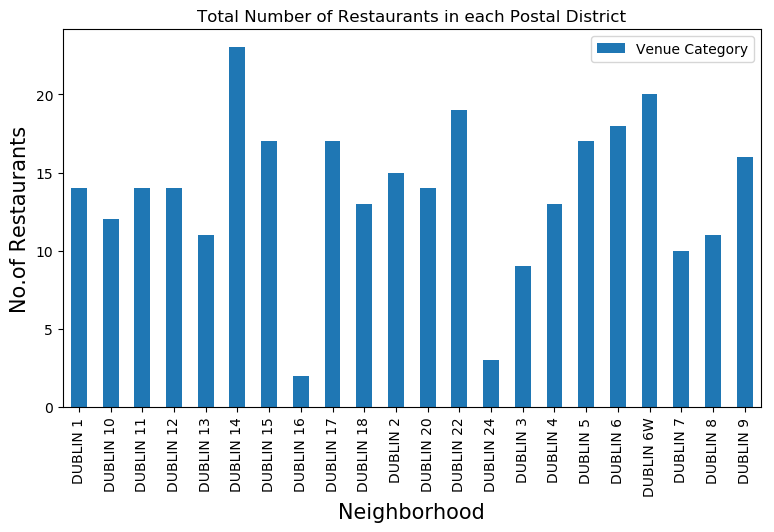

In [33]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Total Number of Restaurants in each Postal District')
#On x-axis
plt.xlabel('Dublin', fontsize = 15)
#On y-axis
plt.ylabel('No.of Restaurants', fontsize=15)
#giving a bar plot
dublin_venues.groupby('Neighborhood')['Venue Category'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

In [34]:
dublin_venues.groupby('Venue Category').count()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
American Restaurant,1,1,1,1,1,1
Asian Restaurant,18,18,18,18,18,18
Chinese Restaurant,13,13,13,13,13,13
Falafel Restaurant,9,9,9,9,9,9
Fast Food Restaurant,25,25,25,25,25,25
French Restaurant,3,3,3,3,3,3
Hungarian Restaurant,1,1,1,1,1,1
Indian Restaurant,15,15,15,15,15,15
Italian Restaurant,39,39,39,39,39,39


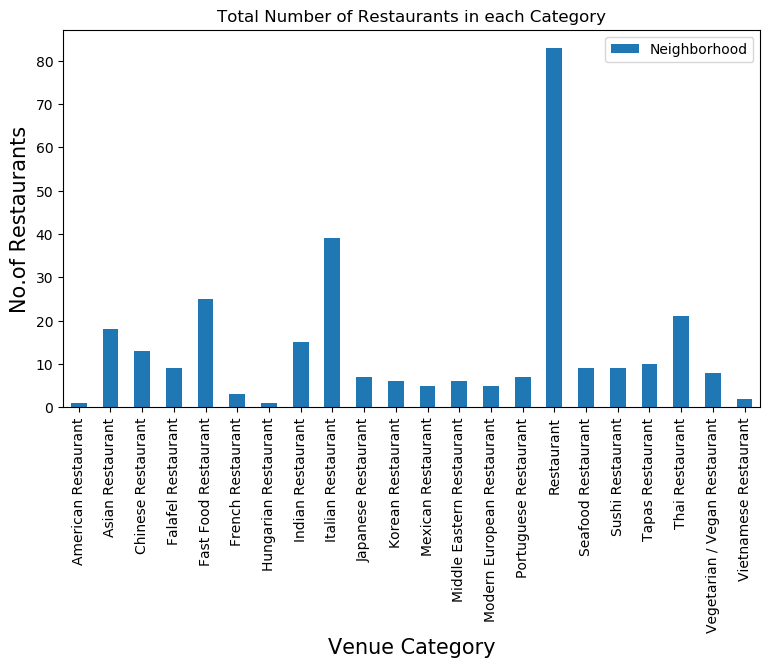

In [35]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Total Number of Restaurants in each Category')
#On x-axis
plt.xlabel('Type of Restaurants', fontsize = 15)
#On y-axis
plt.ylabel('No.of Restaurants', fontsize=15)
#giving a bar plot
dublin_venues.groupby('Venue Category')['Neighborhood'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()